OASIS INFOBYTE INTERNSHIP TASK 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
x = df['symboling'].values.reshape(-1,1)

In [10]:
x

array([[ 3],
       [ 3],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [-1],
       [ 3],
       [ 2],
       [ 2],
       [ 1],
       [ 1],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 1],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [-1],
       [-1],
       [ 0],
       [-1],
       [-1],
       [ 3],
       [ 0],
       [ 1],
       [ 1],
       [ 2],

In [11]:
y = df['horsepower'].values.reshape(-1,1)

In [12]:
y

array([[111],
       [111],
       [154],
       [102],
       [115],
       [110],
       [110],
       [110],
       [140],
       [160],
       [101],
       [101],
       [121],
       [121],
       [121],
       [182],
       [182],
       [182],
       [ 48],
       [ 70],
       [ 70],
       [ 68],
       [ 68],
       [102],
       [ 68],
       [ 68],
       [ 68],
       [102],
       [ 88],
       [145],
       [ 58],
       [ 76],
       [ 60],
       [ 76],
       [ 76],
       [ 76],
       [ 76],
       [ 86],
       [ 86],
       [ 86],
       [ 86],
       [101],
       [100],
       [ 78],
       [ 70],
       [ 70],
       [ 90],
       [176],
       [176],
       [262],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [ 68],
       [101],
       [101],
       [101],
       [135],
       [ 84],
       [ 84],
       [ 84],
       [ 84],
       [ 64],
       [ 84],
       [120],
       [ 72],
       [123],
       [123],
       [123],
       [123],
      

In [14]:
z = df['price'].values.reshape(-1,1)

In [15]:
z

array([[13495.   ],
       [16500.   ],
       [16500.   ],
       [13950.   ],
       [17450.   ],
       [15250.   ],
       [17710.   ],
       [18920.   ],
       [23875.   ],
       [17859.167],
       [16430.   ],
       [16925.   ],
       [20970.   ],
       [21105.   ],
       [24565.   ],
       [30760.   ],
       [41315.   ],
       [36880.   ],
       [ 5151.   ],
       [ 6295.   ],
       [ 6575.   ],
       [ 5572.   ],
       [ 6377.   ],
       [ 7957.   ],
       [ 6229.   ],
       [ 6692.   ],
       [ 7609.   ],
       [ 8558.   ],
       [ 8921.   ],
       [12964.   ],
       [ 6479.   ],
       [ 6855.   ],
       [ 5399.   ],
       [ 6529.   ],
       [ 7129.   ],
       [ 7295.   ],
       [ 7295.   ],
       [ 7895.   ],
       [ 9095.   ],
       [ 8845.   ],
       [10295.   ],
       [12945.   ],
       [10345.   ],
       [ 6785.   ],
       [ 8916.5  ],
       [ 8916.5  ],
       [11048.   ],
       [32250.   ],
       [35550.   ],
       [36000.   ],


In [16]:
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size = 0.2, random_state = 42)

In [17]:
x_train, x_test, y_train, y_test, z_train, z_test 

(array([[ 0],
        [ 0],
        [ 0],
        [ 1],
        [ 0],
        [ 1],
        [ 2],
        [ 0],
        [ 3],
        [ 1],
        [ 3],
        [ 1],
        [-1],
        [ 1],
        [ 2],
        [ 2],
        [ 3],
        [ 3],
        [ 2],
        [ 0],
        [ 3],
        [-1],
        [ 1],
        [-1],
        [ 2],
        [ 0],
        [ 0],
        [ 3],
        [ 1],
        [ 0],
        [ 3],
        [ 2],
        [ 1],
        [ 0],
        [ 1],
        [ 0],
        [ 3],
        [ 2],
        [ 1],
        [ 1],
        [ 2],
        [-1],
        [ 0],
        [ 1],
        [ 2],
        [ 2],
        [ 1],
        [ 3],
        [ 1],
        [ 2],
        [ 0],
        [ 0],
        [ 1],
        [ 1],
        [ 2],
        [ 0],
        [ 1],
        [ 0],
        [-1],
        [ 1],
        [ 1],
        [ 1],
        [ 3],
        [-2],
        [ 0],
        [ 2],
        [ 1],
        [ 0],
        [ 2],
        [ 0],
        [ 0],
      

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
model = LinearRegression()
model.fit(x_train, z_train)

LinearRegression()

In [20]:
model = LinearRegression()
model.fit(y_train, z_train)

LinearRegression()

In [21]:
z_pred = model.predict(x_test)

In [22]:
z_pred

array([[-3126.86991019],
       [-3126.86991019],
       [-3126.86991019],
       [-2658.38583845],
       [-3283.03126744],
       [-2970.70855295],
       [-3126.86991019],
       [-3126.86991019],
       [-3126.86991019],
       [-2814.5471957 ],
       [-3126.86991019],
       [-2970.70855295],
       [-3126.86991019],
       [-3283.03126744],
       [-3126.86991019],
       [-2970.70855295],
       [-2814.5471957 ],
       [-2658.38583845],
       [-2970.70855295],
       [-3126.86991019],
       [-3126.86991019],
       [-3126.86991019],
       [-2814.5471957 ],
       [-2814.5471957 ],
       [-2970.70855295],
       [-3126.86991019],
       [-2814.5471957 ],
       [-3283.03126744],
       [-2970.70855295],
       [-3439.19262468],
       [-3283.03126744],
       [-2970.70855295],
       [-3126.86991019],
       [-3283.03126744],
       [-2970.70855295],
       [-3126.86991019],
       [-3126.86991019],
       [-2658.38583845],
       [-3126.86991019],
       [-2658.38583845],


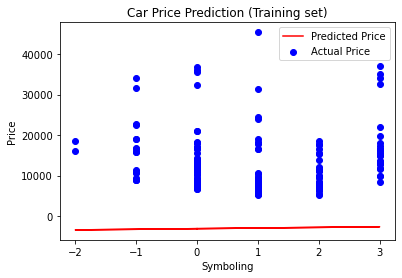

In [23]:
plt.scatter(x_train, z_train, color='blue', label='Actual Price')
plt.plot(x_train, model.predict(x_train), color='red', label='Predicted Price')
plt.title('Car Price Prediction (Training set)')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.legend()
plt.show()

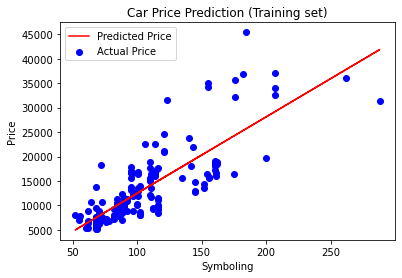

In [24]:
plt.scatter(y_train, z_train, color='blue', label='Actual Price')
plt.plot(y_train, model.predict(y_train), color='red', label='Predicted Price')
plt.title('Car Price Prediction (Training set)')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.legend()
plt.show()

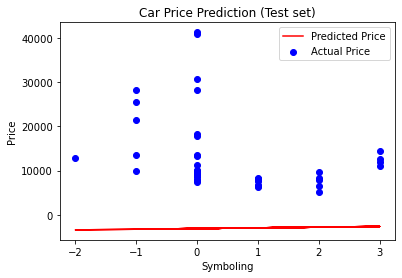

In [25]:
plt.scatter(x_test, z_test, color='blue', label='Actual Price')
plt.plot(x_test, z_pred, color='red', label='Predicted Price')
plt.title('Car Price Prediction (Test set)')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.legend()
plt.show()

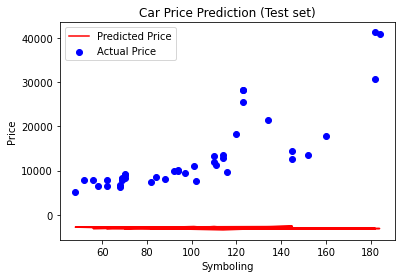

In [26]:
plt.scatter(y_test, z_test, color='blue', label='Actual Price')
plt.plot(y_test, z_pred, color='red', label='Predicted Price')
plt.title('Car Price Prediction (Test set)')
plt.xlabel('Symboling')
plt.ylabel('Price')
plt.legend()
plt.show()
